In [13]:
# Dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

# import datetime as dictimport matplotlib.dates as mdates

In [14]:
file_path = 'solar_data.csv'
df = pd.read_csv(file_path)
df.head()

,Date time,Home (kW),Solar (kW),Grid (kW)
0,2023-07-26T00:00:00-05:00,3.1,0.0,2.6
1,2023-07-26T00:05:00-05:00,2.6,0.0,0.2
2,2023-07-26T00:10:00-05:00,0.2,0.0,3.0
3,2023-07-26T00:15:00-05:00,3.0,0.0,3.1
4,2023-07-26T00:20:00-05:00,3.1,0.0,3.1


In [16]:
# Convert the 'Date time' column to pandas datetime objects
df['Date time'] = pd.to_datetime(df['Date time'])

# Sort the DataFrame based on the date column in ascending order
df.sort_values(by='Date time', inplace=True)

# Set the 'Date time' column as the index
df.set_index('Date time', inplace=True)

df.head()

,Home (kW),Solar (kW),Grid (kW)
Date time,,,
2023-06-27 00:00:00-05:00,3.1,0.0,3.1
2023-06-27 00:05:00-05:00,3.1,0.0,3.1
2023-06-27 00:10:00-05:00,3.1,0.0,3.1
2023-06-27 00:15:00-05:00,3.1,0.0,3.1
2023-06-27 00:20:00-05:00,3.1,0.0,0.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8879 entries, 2023-06-27 00:00:00-05:00 to 2023-07-27 19:50:00-05:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Home (kW)   8879 non-null   float64
 1   Solar (kW)  8879 non-null   float64
 2   Grid (kW)   8879 non-null   float64
dtypes: float64(3)
memory usage: 277.5 KB


In [18]:
# Print statistical overview 
df.describe()

,Home (kW),Solar (kW),Grid (kW)
count,8879.000000,8879.000000,8879.000000
mean,1.527942,0.999133,1.027278
std,1.638593,1.305674,1.549235
min,0.000000,0.000000,0.000000
25%,0.300000,0.000000,0.000000
50%,0.500000,0.200000,0.200000
75%,3.000000,2.100000,2.100000
max,13.500000,3.900000,10.400000


In [19]:
# Sum of all solar KW's produced
total_solar = df['Solar (kW)'].sum()
total_solar

8871.3

# This system is rated at 4.8 watts yet yields only a maxmimum of 3.9 kW's. This implies a large loss of potential production over the span of the unit's life cycle and should be addressed. 

In [23]:
# Realize maximum output
max_output = df['Solar (kW)'].max()
max_output

3.9

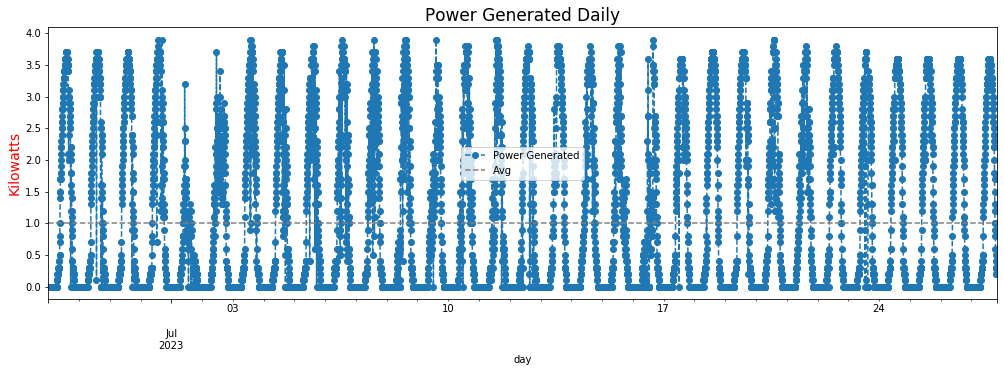

In [32]:
output =df.copy()
output['day']=output.index
output=output.groupby('day').sum()
output['output']=output['Solar (kW)']

output['output'].plot(style='o--',figsize=(17,5),label='Power Generated')

plt.title('Power Generated Daily',size=17)
plt.ylabel('Kilowatts',fontsize=14,color='red')
plt.axhline(output['output'].mean(),linestyle='--',color='gray',label='Avg')
plt.legend()
plt.show()